In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/musaidriss/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Install and Import Seaborn

In [2]:
 import seaborn as sns

In [3]:
# Only get the data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

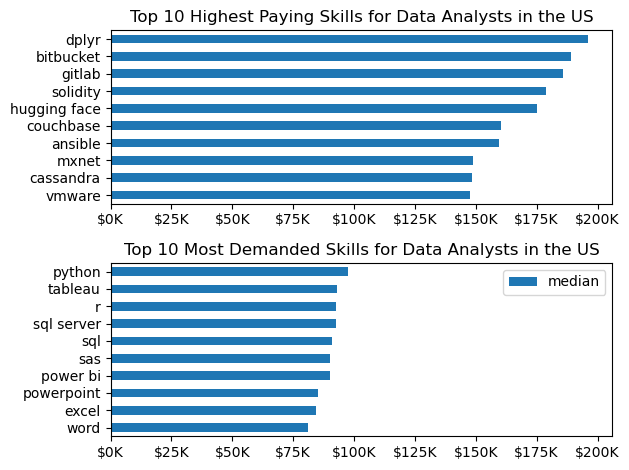

In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
# could do df_DA_top_pay.invert_yaxis() as well

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Demanded Skills for Data Analysts in the US')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()

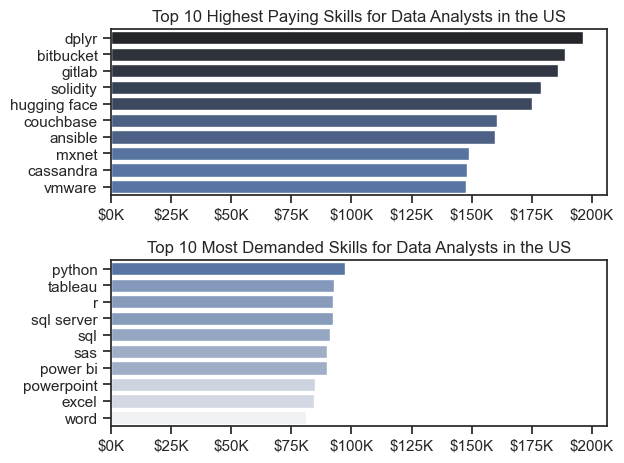

In [14]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

# Top 10 Highest Paying Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend_.remove()

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
# could do df_DA_top_pay.invert_yaxis() as well

# Top 10 Most Demanded Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend_.remove()

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1]
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Demanded Skills for Data Analysts in the US')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Jobs')

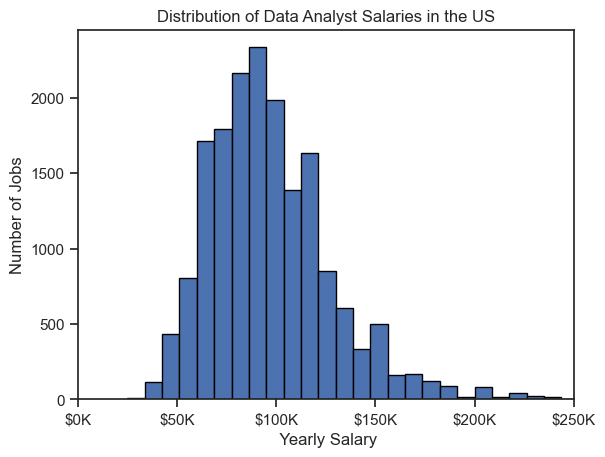

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distribution of Data Analyst Salaries in the US')
plt.xlabel(' Yearly Salary')
plt.ylabel('Number of Jobs')

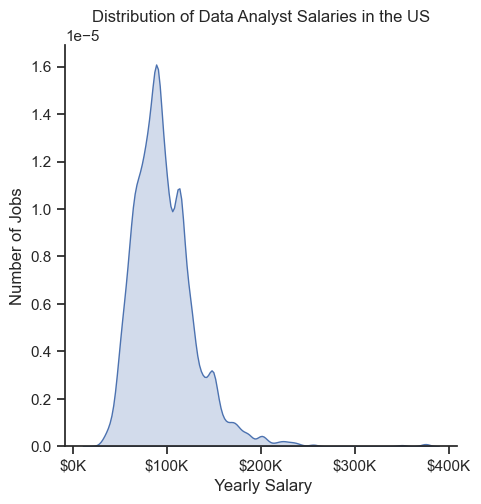

In [20]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of Data Analyst Salaries in the US')
plt.xlabel(' Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

/var/folders/mc/f38vxxz110q2vyy1qcfk60j40000gn/T/ipykernel_46669/1385449848.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


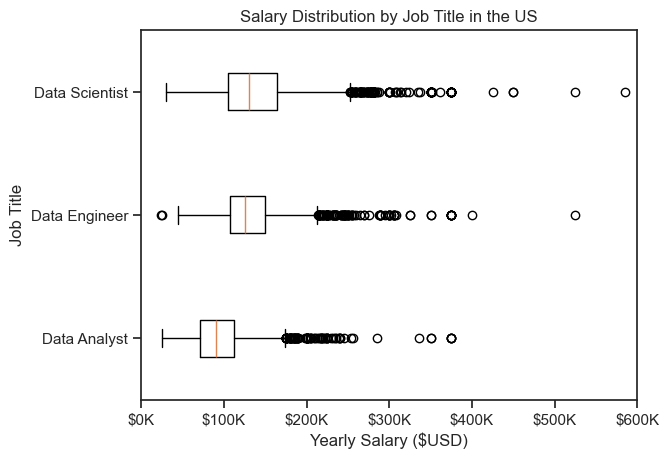

In [21]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job titles
# Only get the data analyst jobs 
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [
    df_US[df_US['job_title_short'] == job_title]['salary_year_avg']
    for job_title in job_titles
]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

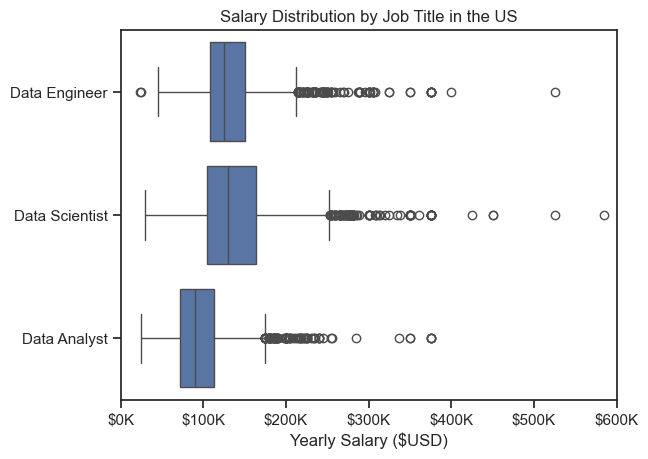

In [23]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()